# Week 4 - CLUSTERING - 03.02

## Project Challenges: 03.02





Practicing K-means Clustering


Exercise: Bikes dataset has a few columns that are describing the weather: numerical columns (temp, atemp, humidity, windspeed) and the categorical weather column.

Use provided notebook to discover how many clusters for weather data would be suggested using the elbow method. Is this number the same as the unique weather groups that are already visible in the data?


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as sm
import scipy.stats as sps
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
bike_data = pd.read_csv('../data/bikes_clean.csv', parse_dates=True, index_col=0)

In [5]:
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,1,2011,morning
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,1,2011,morning
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,1,2011,morning
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,1,2011,morning
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,1,2011,morning


<AxesSubplot: xlabel='part_of_day', ylabel='month'>

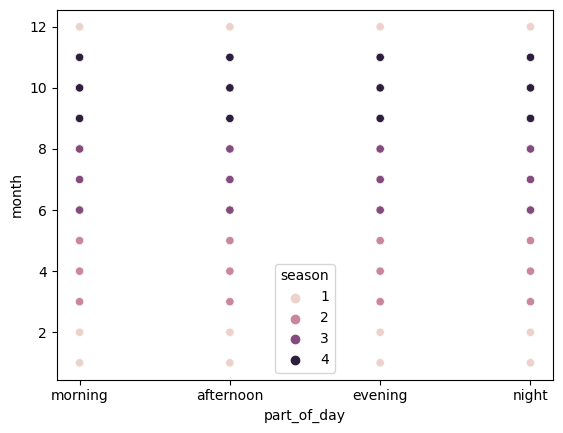

In [352]:
sns.scatterplot(x='part_of_day' , y='month', data = bike_data, hue='season')

<AxesSubplot: xlabel='year', ylabel='month'>

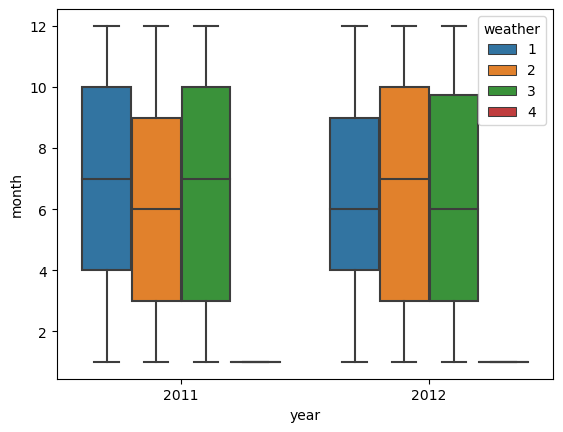

In [353]:
sns.boxplot(x='year' , y='month', data = bike_data, hue='weather')

<AxesSubplot: xlabel='year', ylabel='month'>

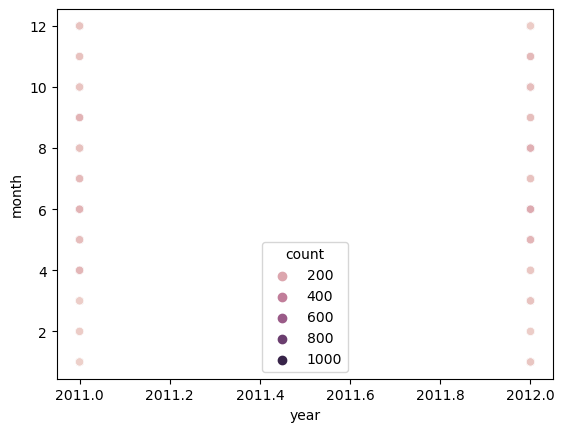

In [354]:
sns.scatterplot(x='year' , y='month', data = bike_data, hue='count')

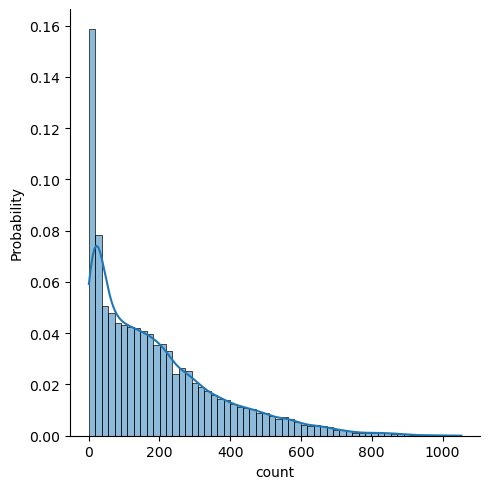

In [357]:
sns.displot(data=bike_data, x = 'count', stat='probability', kde=True)

In [361]:
bike_data[bike_data['year']== '2011'].describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,month,year
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
bike_data_num = bike_data[['hour_of_day', 'month', 'year']]
bike_data_num.head()

,hour_of_day,month,year
datetime,,,
2011-01-01 00:00:00,0,1,2011
2011-01-01 01:00:00,1,1,2011
2011-01-01 02:00:00,2,1,2011
2011-01-01 03:00:00,3,1,2011
2011-01-01 04:00:00,4,1,2011


In [7]:
weather = bike_data[['temp', 'atemp', 'humidity', 'windspeed']]
weather.sample(10)

,temp,atemp,humidity,windspeed
datetime,,,,
2012-06-22 21:00:00,27.88,31.820,65,19.0012
2012-07-19 05:00:00,29.52,34.090,70,7.0015
2012-07-17 04:00:00,29.52,34.090,62,0.0000
2012-01-30 08:00:00,8.20,9.850,47,15.0013
2012-01-10 05:00:00,16.40,20.455,47,15.0013
2012-10-02 01:00:00,22.14,25.760,77,7.0015
2011-03-31 04:00:00,9.84,11.365,93,16.9979
2011-12-24 11:00:00,13.12,14.395,39,23.9994
2011-12-04 01:00:00,12.30,15.910,75,6.0032


In [8]:
weather.describe()

,temp,atemp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


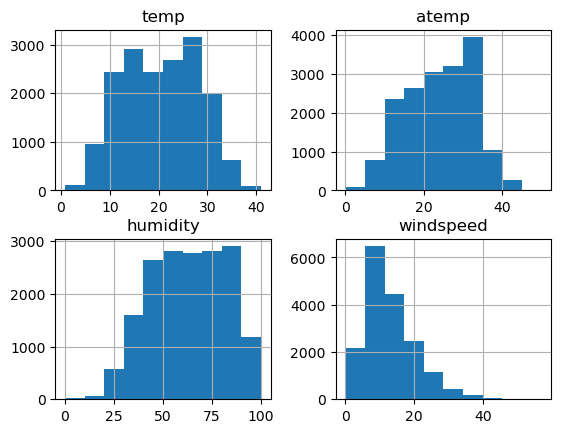

In [9]:
weather.hist();

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(weather)

/Users/anacoutinho/opt/anaconda3/envs/spiced/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [22]:
clusters = kmeans.predict(weather)
clusters

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [23]:
kmeans.inertia_ 

2817436.0843725167

In [42]:
weather_scaled = scaler.transform(weather)
weather_scaled

array([[-1.33464759, -1.0932806 ,  0.9473725 , -1.55388851],
       [-1.4385164 , -1.18173227,  0.89553869, -1.55388851],
       [-1.4385164 , -1.18173227,  0.89553869, -1.55388851],
       ...,
       [-1.23077877, -1.26960201, -0.14113744, -0.21169121],
       [-1.23077877, -1.18173227, -0.34847267, -0.45609864],
       [-1.23077877, -1.18173227,  0.11803159, -0.45609864]])

In [43]:
weather_clustered = bike_data.copy() 
weather_clustered["cluster"] = clusters
weather_clustered

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,month,year,part_of_day,cluster
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,2011,morning,3
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,2011,morning,3
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,2011,morning,3
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,2011,morning,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,2011,morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,2012,night,0
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,2012,night,0
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,2012,night,0


In [45]:
weather_clustered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       17379 non-null  int64  
 1   holiday      17379 non-null  int64  
 2   workingday   17379 non-null  int64  
 3   weather      17379 non-null  int64  
 4   temp         17379 non-null  float64
 5   atemp        17379 non-null  float64
 6   humidity     17379 non-null  int64  
 7   windspeed    17379 non-null  float64
 8   casual       10886 non-null  float64
 9   registered   10886 non-null  float64
 10  count        17379 non-null  int64  
 11  hour_of_day  17379 non-null  int64  
 12  month        17379 non-null  int64  
 13  year         17379 non-null  int64  
 14  part_of_day  17379 non-null  object 
 15  cluster      17379 non-null  int32  
dtypes: float64(5), int32(1), int64(9), object(1)
memory usage: 2.2+ MB
